In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle


In [3]:
df = pd.read_csv("dataset.csv")

## Análise Exploratória
Esta análise servirá para melhor compreensão de como os dados funcionam e entendendo as correlações entre eles que informam se é um cliente em potencial ou não.

Utilizamos uma base de dados inventada apenas para demonstração de como funcionaria o modelo na prática.

In [4]:
df = df.dropna()

visitor_id
page_views
time_on_site
products_viewed
cart_additions
previous_purchases
source
target


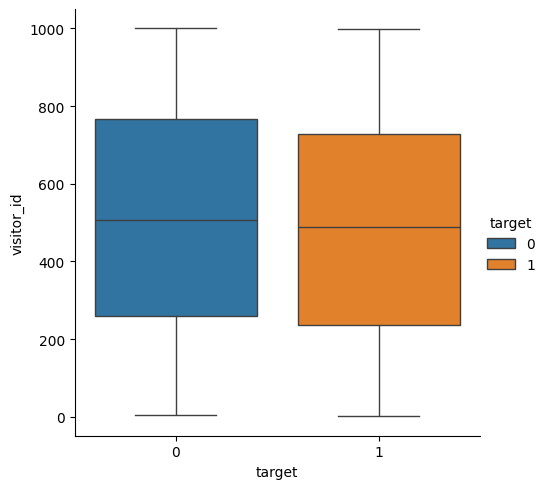

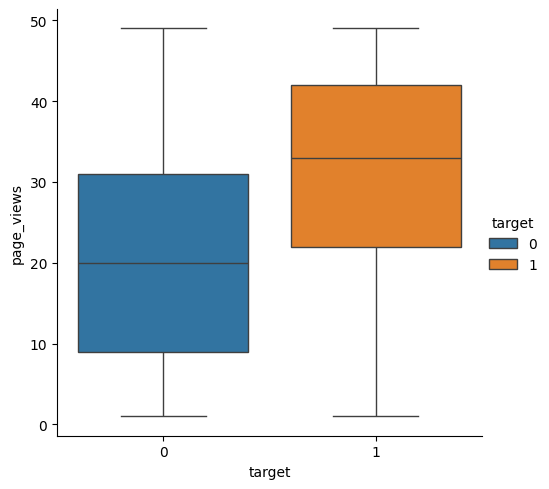

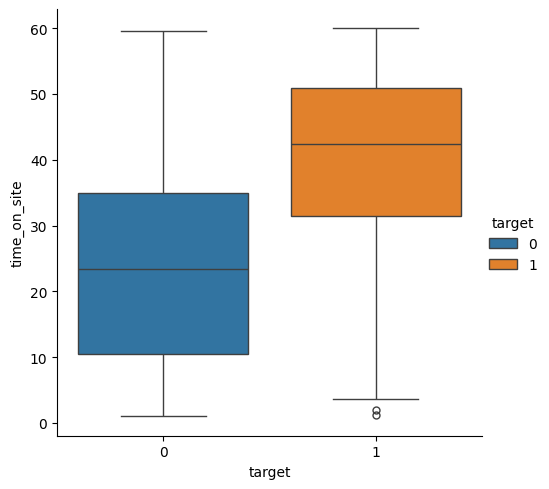

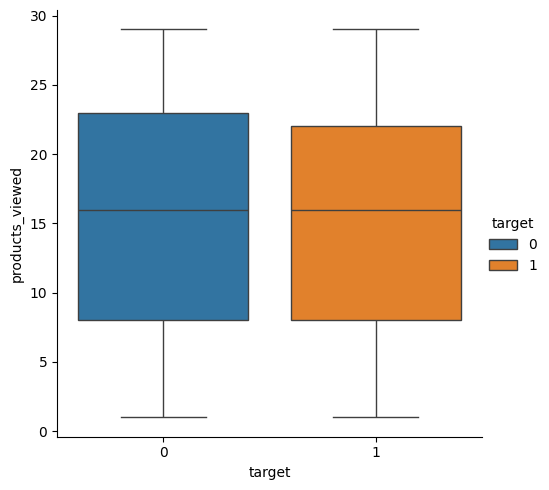

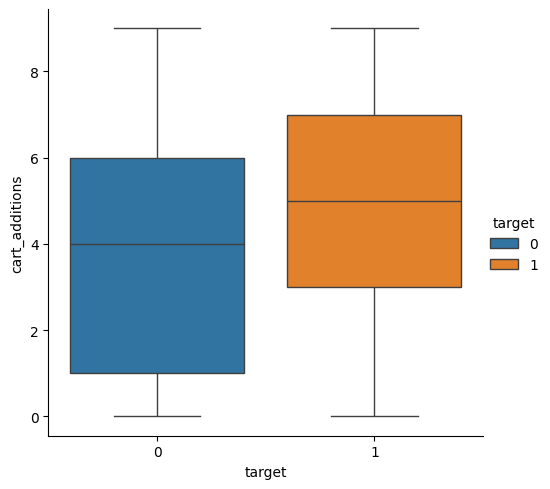

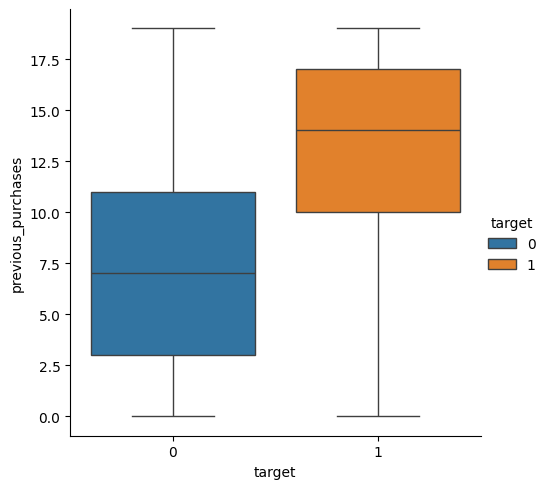

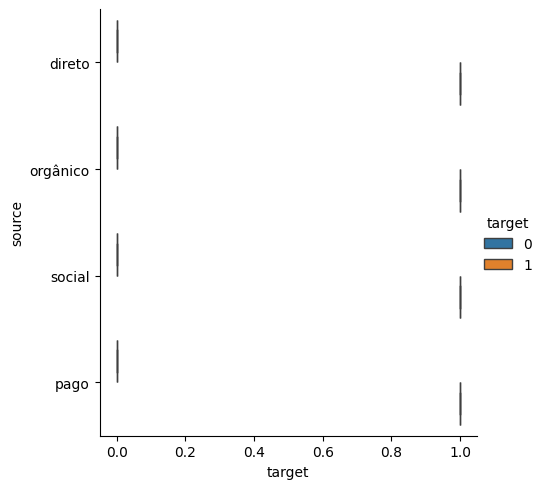

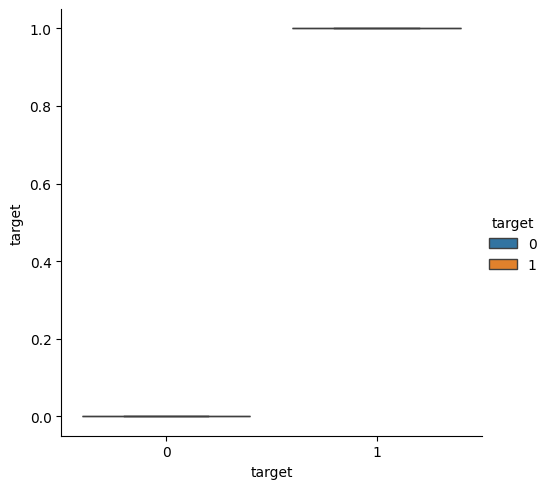

In [5]:
for col in df.columns:
    print(col)
    sns.catplot(data=df, x="target", y=col, kind="box", hue="target")

Text(0.5, 1.0, 'Fonte de Tráfego por Target')

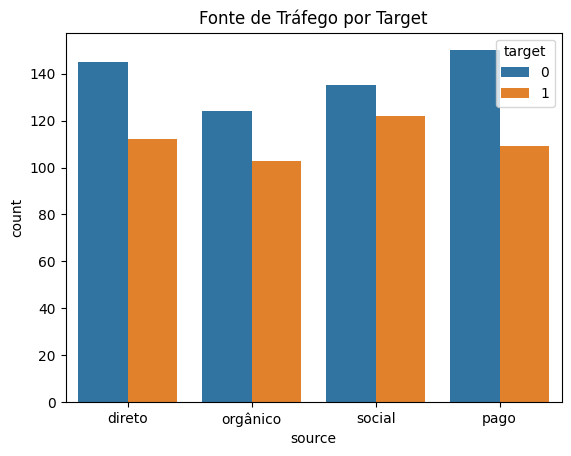

In [6]:
sns.countplot(x='source', hue='target', data=df)
plt.title('Fonte de Tráfego por Target')



### Conclusão:

Por esses dados é um pouco difícil identificar clientes em potencial, o que podemos perceber é que **page_views**, **time_on_site**, **cart_additions** e  **previous_purchases** foram as partes mais relevantes para identificá-los pois há uma diferença claramente visível que quanto mais alta a barra laranja estava em relação a azul, maior a chance de compra de um cliente. 

Outra coisa que pudemos perceber é que a fonte de tráfego não foi tão importante quanto pensavamos que era, todas as barras azuis estão maiores que as laranjas. No entanto se analisarmos apenas as barras laranjas percebe-se que o **social** é a melhor estratégia de captação de clientes.

In [7]:
#Tranformando a coluna de source em números para poder treinar o modelo 

source_map = {'direto': 1, 'orgânico': 2, 'social': 3, 'pago': 4}

In [8]:
df_num= df.copy()

In [9]:
df_num['source'] = df_num['source'].map(source_map)

In [10]:
#Declarando as entradas e saídas

X = df_num.drop("target", axis=1)

y= df_num["target"]

# Treinando o modelo

In [11]:
# Dividindo os dados entre treino(70%) e teste(30%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
# Treinando o modelo

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
round(accuracy_score(y_test, clf.predict(X_test))*100,2)

93.67

In [15]:
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)